Lambda School Data Science

*Unit 4, Sprint 3, Module 2*

---

# Convolutional Neural Networks (Prepare)

> Convolutional networks are simply neural networks that use convolution in place of general matrix multiplication in at least one of their layers. *Goodfellow, et al.*

## Learning Objectives
- <a href="#p1">Part 1: </a>Describe convolution and pooling
- <a href="#p2">Part 2: </a>Apply a convolutional neural network to a classification task
- <a href="#p3">Part 3: </a>Use a pre-trained convolution neural network for image classification

Modern __computer vision__ approaches rely heavily on convolutions as both a dimensionality reduction and feature extraction method. Before we dive into convolutions, let's talk about some of the common computer vision applications: 
* Classification [(Hot Dog or Not Dog)](https://www.youtube.com/watch?v=ACmydtFDTGs)
* Object Detection [(YOLO)](https://www.youtube.com/watch?v=MPU2HistivI)
* Pose Estimation [(PoseNet)](https://ai.googleblog.com/2019/08/on-device-real-time-hand-tracking-with.html)
* Facial Recognition [Emotion Detection](https://www.cbronline.com/wp-content/uploads/2018/05/Mona-lIsa-test-570x300.jpg)
* and *countless* more 

We are going to focus on classification and pre-trained classification today. What are some of the applications of image classification?

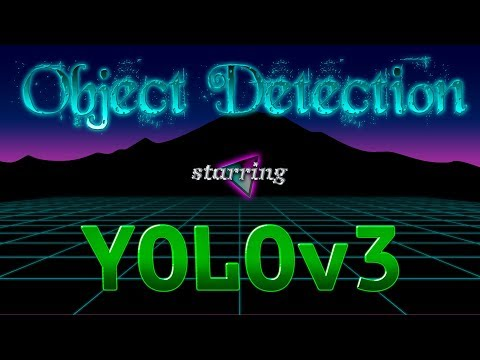

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('MPU2HistivI', width=600, height=400)

# Convolution & Pooling (Learn)
<a id="p1"></a>

## Overview

Like neural networks themselves, CNNs are inspired by biology - specifically, the receptive fields of the visual cortex.

Put roughly, in a real brain the neurons in the visual cortex *specialize* to be receptive to certain regions, shapes, colors, orientations, and other common visual features. In a sense, the very structure of our cognitive system transforms raw visual input, and sends it to neurons that specialize in handling particular subsets of it.

CNNs imitate this approach by applying a convolution. A convolution is an operation on two functions that produces a third function, showing how one function modifies another. Convolutions have a [variety of nice mathematical properties](https://en.wikipedia.org/wiki/Convolution#Properties) - commutativity, associativity, distributivity, and more. Applying a convolution effectively transforms the "shape" of the input.

One common confusion - the term "convolution" is used to refer to both the process of computing the third (joint) function and the process of applying it. In our context, it's more useful to think of it as an application, again loosely analogous to the mapping from visual field to receptive areas of the cortex in a real animal.

## Follow Along

Let's try to do some convolutions and pooling


### Convolution (CNN component 1)
#### A Convolution in Action: like projection

![Convolution](https://miro.medium.com/max/1170/1*Fw-ehcNBR9byHtho-Rxbtw.gif)

Consider blurring an image - assume the image is represented as a matrix of numbers, where each number corresponds to the color value of a pixel.

![](https://lambdaschool-data-science.s3.amazonaws.com/images/Unit4/Sprint2/Module2/Screen+Shot+2020-02-25+at+10.27.17+AM.png)

(gif: https://medium.datadriveninvestor.com/convolutional-neural-networks-3b241a5da51e)

Image Credits from *Hands on Machine Learning with Sckit-Learn, Keras & TensorFlow*



Helpful Terms:
- __Filter__: The weights (parameters) we will apply to our input image.
- __Stride__: How the filter moves across the image
- __Padding__: Zeros (or other values) around the  the input image border (kind of like a frame of zeros). 

★★ **Convolution explained with real image**: https://setosa.io/ev/image-kernels/  

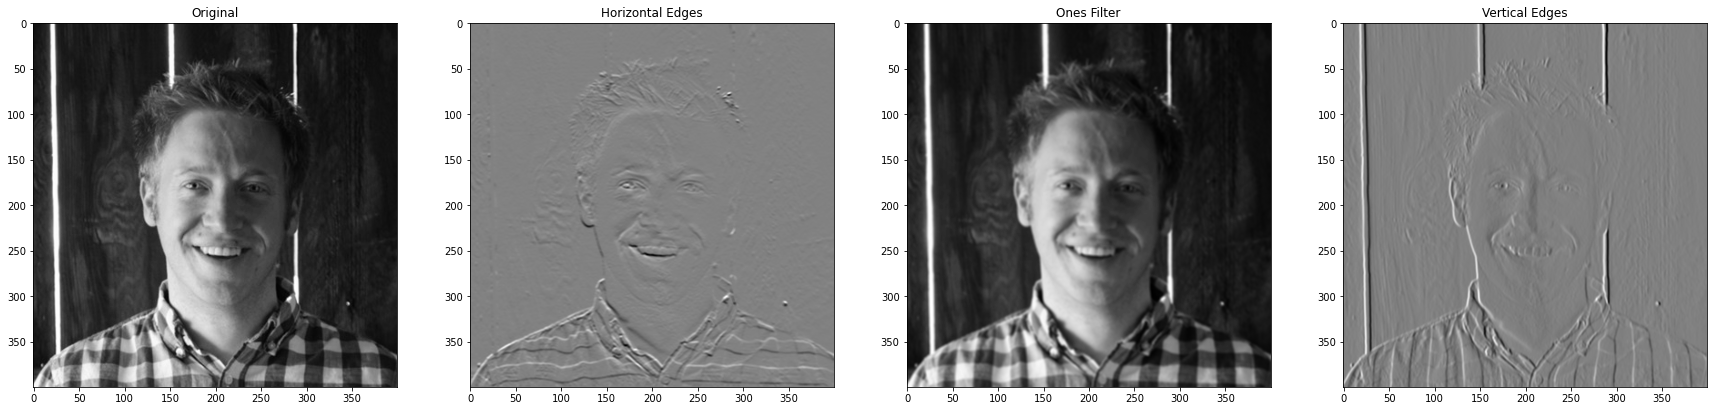

In [2]:
import imageio
import matplotlib.pyplot as plt
from skimage import color, io
from skimage.exposure import rescale_intensity
import numpy as np
import scipy.ndimage as nd

austen = io.imread('https://dl.airtable.com/S1InFmIhQBypHBL0BICi_austen.jpg')
austen_grayscale = rescale_intensity(color.rgb2gray(austen))

# horizontal_edge_convolution
horizontal_edge_convolution = np.array([[1,1,1],
                                        [0,0,0],
                                        [-1,-1,-1,]])

austen_horizontal = nd.convolve(austen_grayscale, horizontal_edge_convolution) # elementwise multiplication

# vertical_edge_convolution
vertical_edge_convolution = np.array([[1, 0, -1],
                                     [1, 0, -1],
                                     [1, 0, -1]])
austen_vertical = nd.convolve(austen_grayscale, vertical_edge_convolution)

# Identity
ones_convolution = np.array([[1, 1, 1],
                              [1, 1, 1],
                              [1, 1, 1]])
austen_ones = nd.convolve(austen_grayscale, ones_convolution)
plt.figure(figsize=(30,10))

labels = ["Original","Horizontal Edges",  "Ones Filter", "Vertical Edges"]
images = [austen_grayscale, austen_horizontal, austen_ones, austen_vertical]

i = 0
for label, image in zip(labels, images):

    plt.subplot(1,4,i+1)
    plt.grid(False)
    plt.imshow(image, cmap="gray")
    plt.title(label)
    i += 1 

plt.show()


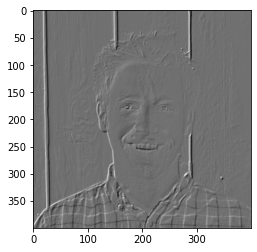

In [3]:
# combine vertical and horizontal edges
combined = austen_horizontal + austen_vertical
# plt.figure(figsize=(30,10))
plt.imshow(combined, cmap="gray")

### Pooling Layer (CNN component 2)

![](https://lambdaschool-data-science.s3.amazonaws.com/images/Unit4/Sprint2/Module2/Screen+Shot+2020-02-25+at+10.26.13+AM.png)

*Image Credits from __Hands on Machine Learning with Sckit-Learn, Keras & TensorFlow__*

We use Pooling Layers to reduce the dimensionality of the feature maps. We get smaller and smaller feature set by apply convolutions and then pooling layers. 

Let's take a look very simple example using Austen's pic. 

In [4]:
from skimage.measure import block_reduce

# Perform max pooling
reduced = block_reduce(combined, (2,2), np.max)

print(combined.shape)
print(reduced.shape)

(400, 400)
(200, 200)


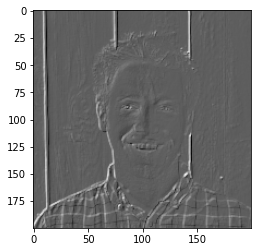

In [5]:
plt.imshow(reduced, cmap='gray')

### Flattern, Dense (CNN component 3+)

## Challenge

You will be expected to be able to describe convolution. 

# CNNs for Classification (Learn)

## Overview

### Typical CNN Architecture

![A Typical CNN](https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/75_blog_image_1.png)

The first stage of a CNN is, unsurprisingly, a convolution - specifically, a transformation that maps regions of the input image to neurons responsible for receiving them. The convolutional layer can be visualized as follows:




Why are CNNs so popular?
1. Compared to prior image learning techniques, they require relatively little image preprocessing (cropping/centering, normalizing, etc.)
2. Relatedly, they are *robust* to all sorts of common problems in images (shifts, lighting, etc.)

Actually training a cutting edge image classification CNN is nontrivial computationally - the good news is, with transfer learning, we can get one "off-the-shelf"!

### **Why CNN works:**  
+ https://medium.com/impactai/cnns-from-different-viewpoints-fab7f52d159c

+ Slide

## Follow Along

In [6]:
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

170500096/170498071 [==============================] - 31s 0us/step


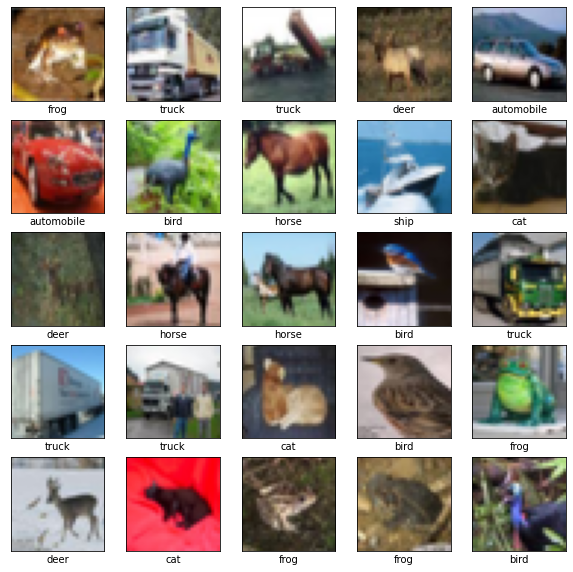

In [7]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [8]:
train_images[0].shape

(32, 32, 3)

In [9]:
unique_elements, counts_elements = np.unique(train_labels, return_counts=True)
print("Frequency of unique values of the said array:")
print(unique_elements, '\n', counts_elements)

Frequency of unique values of the said array:
[0 1 2 3 4 5 6 7 8 9] 
 [5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]


In [10]:
train_images[0].shape

(32, 32, 3)

In [11]:
# Setup Architecture

model = Sequential()

model.add(Conv2D(64, (3,3), activation='relu', input_shape=train_images[0].shape))
model.add(MaxPooling2D((2,2)))
# model.add(Dropout(0.2))   # drop out not really helping

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
# model.add(Dropout(0.2))

model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                8

In [12]:
# Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Fit Model
results = model.fit(train_images, train_labels, 
                    epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.8737 - accuracy: 0.3088 - val_loss: 1.4318 - val_accuracy: 0.4915
Epoch 2/10
1563/1563 [==============================] - 23s 14ms/step - loss: 1.3873 - accuracy: 0.5008 - val_loss: 1.2911 - val_accuracy: 0.5387
Epoch 3/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.2694 - accuracy: 0.5455 - val_loss: 1.1775 - val_accuracy: 0.5734
Epoch 4/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1694 - accuracy: 0.5825 - val_loss: 1.1532 - val_accuracy: 0.5956
Epoch 5/10
1563/1563 [==============================] - 24s 16ms/step - loss: 1.0977 - accuracy: 0.6119 - val_loss: 1.0846 - val_accuracy: 0.6182
Epoch 6/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.0578 - accuracy: 0.6252 - val_loss: 1.0711 - val_accuracy: 0.6179
Epoch 7/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.0199 - accuracy: 0.6391 - val_loss: 1.0468 -

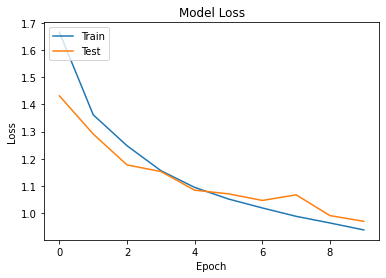

In [14]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show();

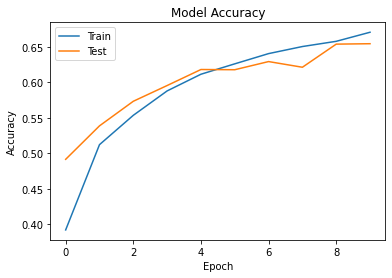

In [15]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show();

In [16]:
# Evaluate Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 3s - loss: 0.9700 - accuracy: 0.6546


#### Recent development: https://paperswithcode.com/sota/image-classification-on-cifar-10
#### What a CNN sees: https://cs231n.github.io/convolutional-networks/

In [17]:
# train_images[0]

In [18]:
np.array([train_images[0]]).shape

(1, 32, 32, 3)

In [19]:
from tensorflow import keras
# Extract intermediate output
layer_name = 'flatten'
intermediate_layer_model = keras.Model(inputs=model.input,
                                       outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model(np.array([train_images[5]])).numpy()

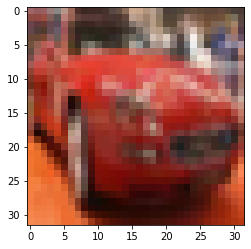

In [20]:
# Display image
plt.imshow(train_images[5], cmap='gray')

In [21]:
intermediate_output  #applicaion: Google image search

array([[0.0000000e+00, 2.6140022e+00, 7.9694676e-01, 0.0000000e+00,
        1.1830477e+00, 0.0000000e+00, 1.4636911e-01, 0.0000000e+00,
        0.0000000e+00, 1.0078095e+00, 0.0000000e+00, 6.8305802e-01,
        0.0000000e+00, 8.3632463e-01, 0.0000000e+00, 4.0881634e-02,
        0.0000000e+00, 1.7528886e+00, 1.4078254e+00, 0.0000000e+00,
        1.5349872e+00, 1.8928498e-02, 1.0053291e+00, 0.0000000e+00,
        0.0000000e+00, 1.0422094e+00, 0.0000000e+00, 1.1874225e+00,
        0.0000000e+00, 8.3557194e-01, 0.0000000e+00, 2.2462487e-02,
        0.0000000e+00, 2.8569120e-01, 1.4367943e+00, 0.0000000e+00,
        1.5022629e+00, 2.0698532e-01, 9.7251505e-02, 0.0000000e+00,
        1.1145599e+00, 1.2653842e+00, 0.0000000e+00, 1.1034132e+00,
        0.0000000e+00, 5.8811677e-01, 0.0000000e+00, 2.7651918e-01,
        0.0000000e+00, 7.9804629e-01, 1.4826562e+00, 0.0000000e+00,
        1.1281582e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.8623880e-01, 1.2686725e+00, 0.0000000e

## Challenge

You will apply CNNs to a classification task in the module project.

# Transfer Learning for Image Classification (Learn)

## Overview

### Transfer Learning Repositories

### **TensorFlow Hub**: TenserFlow Pretrained Model

"A library for reusable machine learning modules"

This lets you quickly take advantage of a model that was trained with thousands of GPU hours. It also enables transfer learning - reusing a part of a trained model (called a module) that includes weights and assets, but also training the overall model some yourself with your own data. The advantages are fairly clear - you can use less training data, have faster training, and have a model that generalizes better.

https://www.tensorflow.org/hub/

TensorFlow Hub is very bleeding edge, and while there's a good amount of documentation out there, it's not always updated or consistent. You'll have to use your problem-solving skills if you want to use it!

#### Keras API - Applications

> Keras Applications are deep learning models that are made available alongside pre-trained weights. These models can be used for prediction, feature extraction, and fine-tuning.

There is a decent selection of important benchmark models. We'll focus on an image classifier: ResNet50.

In [22]:
import tensorflow as tf
import os

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
train_dir = os.path.join(PATH, 'train')
val_dir = os.path.join(PATH, 'validation')

68608000/68606236 [==============================] - 12s 0us/step


In [23]:
batch_size = 128
epochs = 10
IMG_HEIGHT = 224
IMG_WIDTH = 224

train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
val_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size, 
                                                           directory=train_dir,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = val_image_generator.flow_from_directory(batch_size=batch_size, 
                                                           directory=val_dir,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [24]:
# Tensorflow hub example
import tensorflow_hub as hub

# https://www.tensorflow.org/hub -->see models -->Image -->Architect--> mobilenet

model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", output_shape=[1280],  
                   trainable=False),  # Can be True, see below.
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.build([None, IMG_HEIGHT, IMG_WIDTH, 3])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [25]:
# Compile and train

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(train_data_gen,
          steps_per_epoch=2000//batch_size,
          epochs=epochs,
          validation_data=val_data_gen)

Epoch 1/10
15/15 [==============================] - 55s 3s/step - loss: 0.5926 - accuracy: 0.6610 - val_loss: 0.2357 - val_accuracy: 0.9520
Epoch 2/10
15/15 [==============================] - 37s 2s/step - loss: 0.1918 - accuracy: 0.9600 - val_loss: 0.1198 - val_accuracy: 0.9770
Epoch 3/10
15/15 [==============================] - 50s 3s/step - loss: 0.1170 - accuracy: 0.9691 - val_loss: 0.0897 - val_accuracy: 0.9780
Epoch 4/10
15/15 [==============================] - 49s 3s/step - loss: 0.0837 - accuracy: 0.9773 - val_loss: 0.0760 - val_accuracy: 0.9800
Epoch 5/10
15/15 [==============================] - 50s 3s/step - loss: 0.0683 - accuracy: 0.9831 - val_loss: 0.0685 - val_accuracy: 0.9830
Epoch 6/10
15/15 [==============================] - 47s 3s/step - loss: 0.0653 - accuracy: 0.9851 - val_loss: 0.0633 - val_accuracy: 0.9850
Epoch 7/10
15/15 [==============================] - 30s 2s/step - loss: 0.0568 - accuracy: 0.9883 - val_loss: 0.0595 - val_accuracy: 0.9850
Epoch 8/10
15/15 [==

In [26]:
model.save('my_dogs_and_cats_model.h5')

## Follow Along: Load Model directly using Keras Pretrained Model

In [27]:
import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

def img_recognition_pretrain(img):
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  model = ResNet50(weights='imagenet')
  features = model.predict(x)
  results = decode_predictions(features, top=4)[0]
  print(results)
  for entry in results:
    if entry[1] == 'banana':
      return entry[2]
  return 0.0

In [28]:
import requests

image_urls = ["https://github.com/LambdaSchool/ML-YouOnlyLookOnce/raw/master/sample_data/negative_examples/example11.jpeg",
              "https://github.com/LambdaSchool/ML-YouOnlyLookOnce/raw/master/sample_data/positive_examples/example0.jpeg"]

for _id,img in enumerate(image_urls): 
    r = requests.get(img)
    with open(f'example{_id}.jpg', 'wb') as f:
        f.write(r.content)

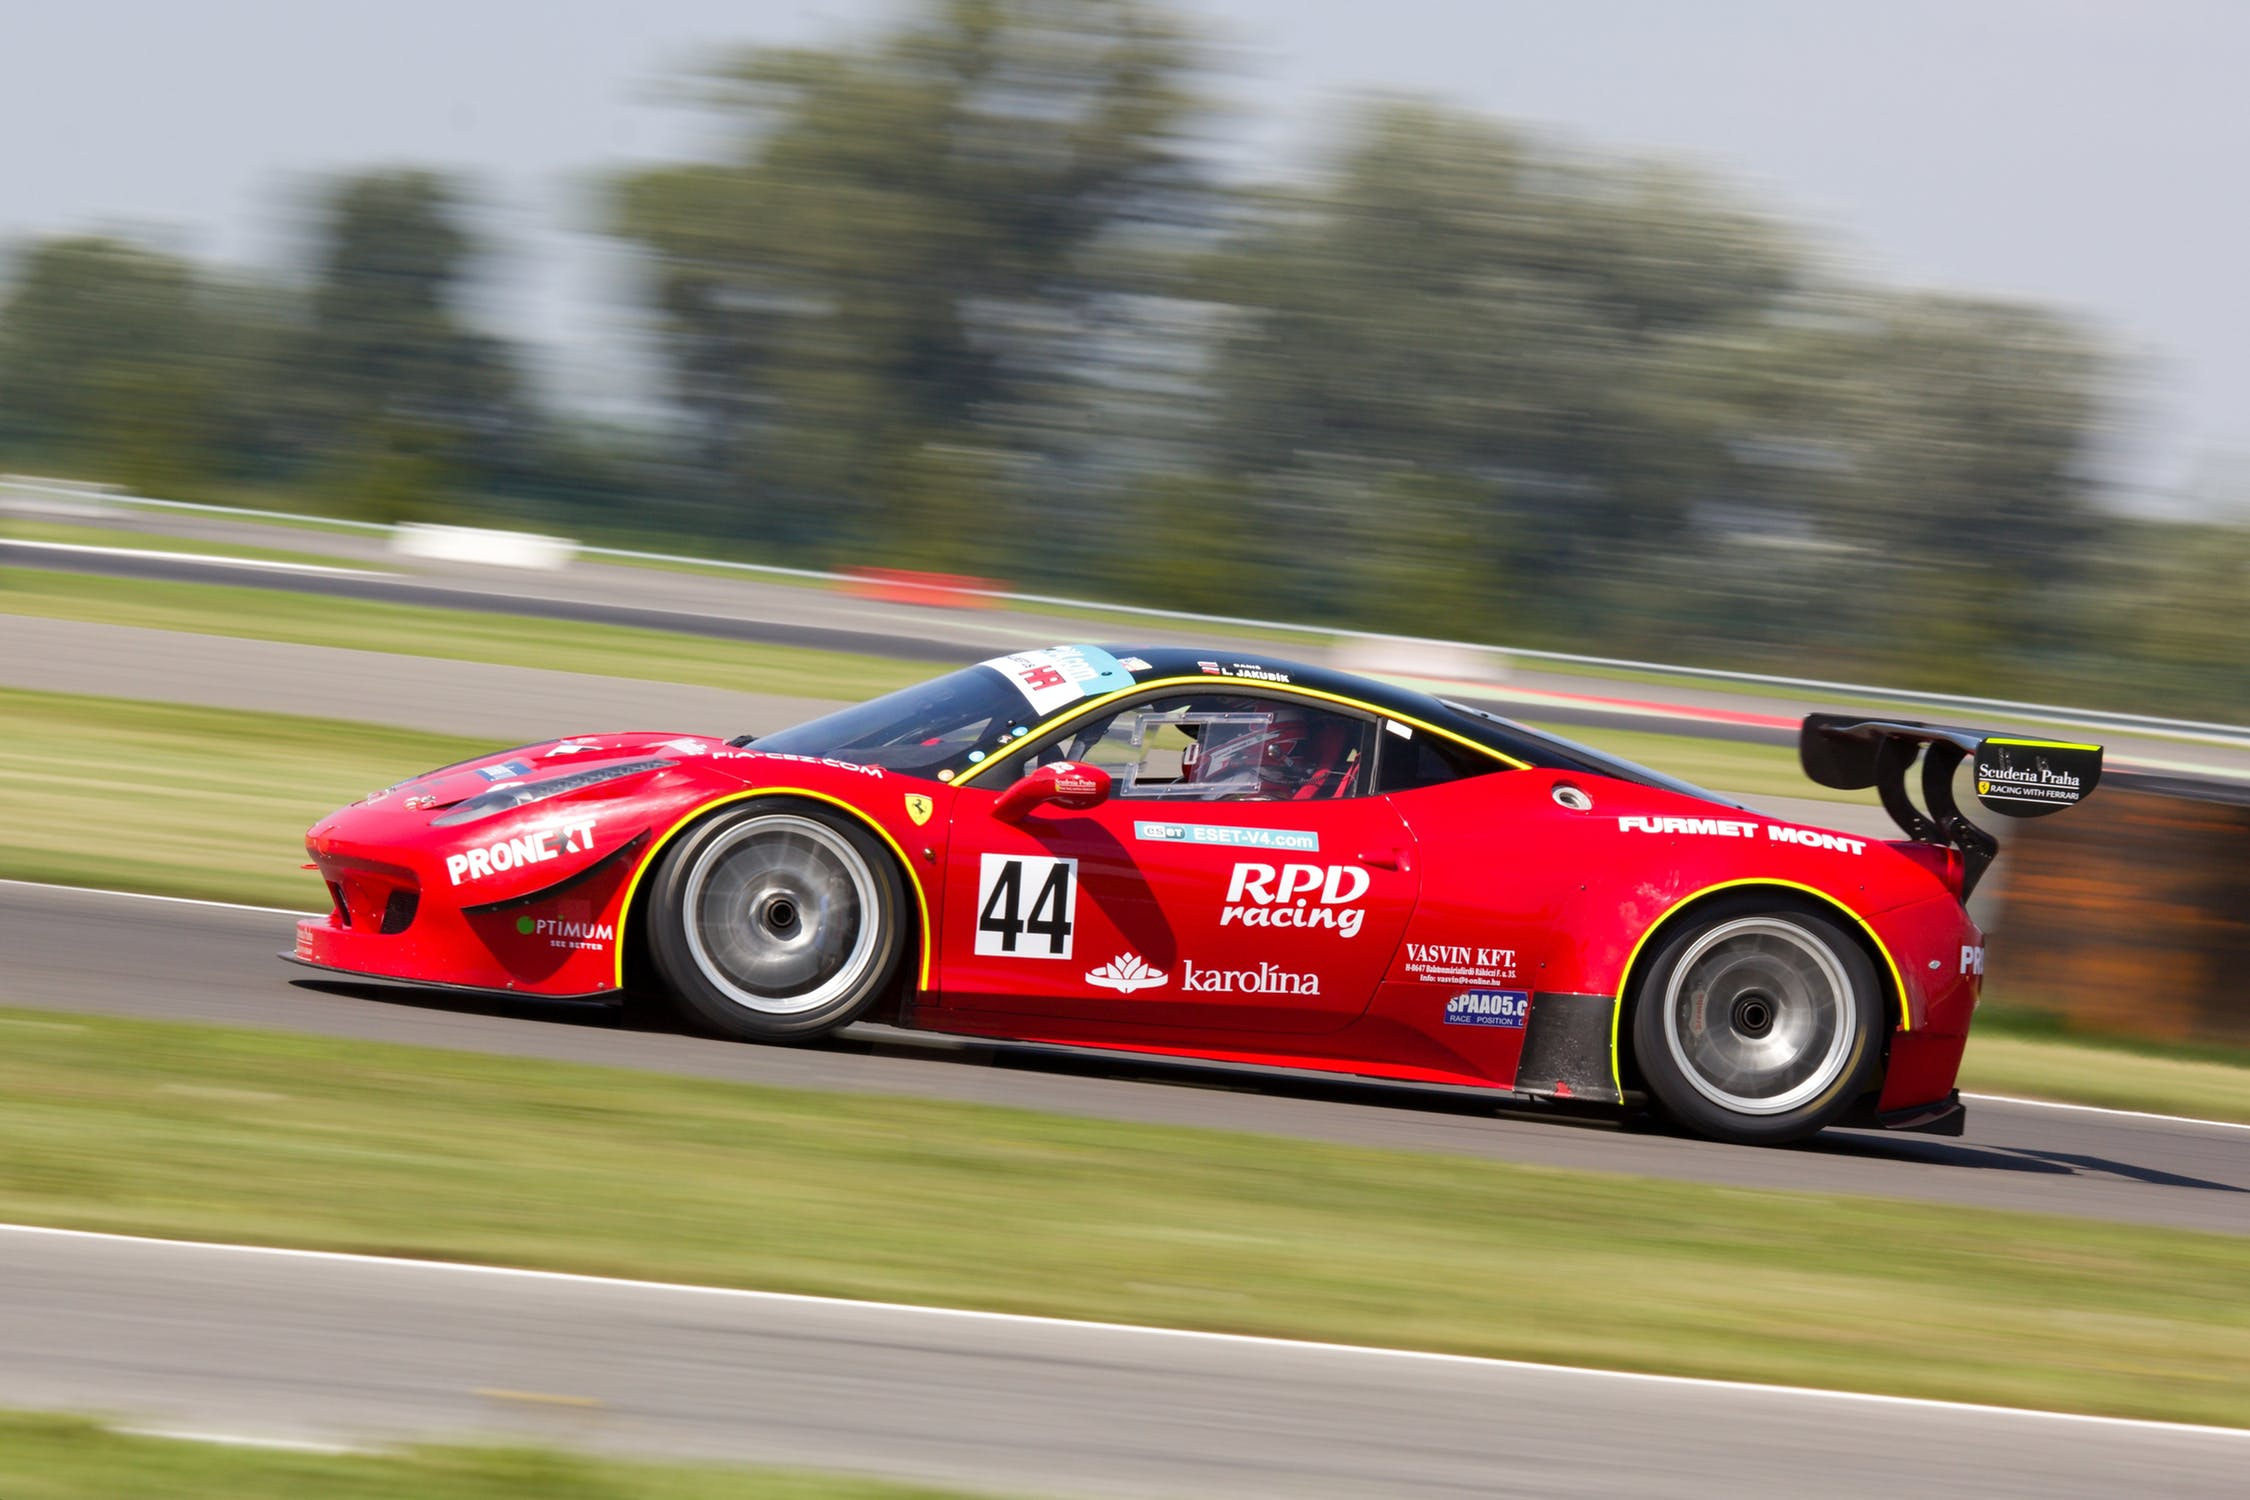

In [29]:
from IPython.display import Image
Image(filename='./example0.jpg', width=600)

In [30]:
img_recognition_pretrain(process_img_path('example0.jpg'))

40960/35363 [==================================] - 0s 1us/step
[('n04037443', 'racer', 0.9256286), ('n04285008', 'sports_car', 0.07028751), ('n04461696', 'tow_truck', 0.0021220413), ('n02974003', 'car_wheel', 0.001467153)]


0.0

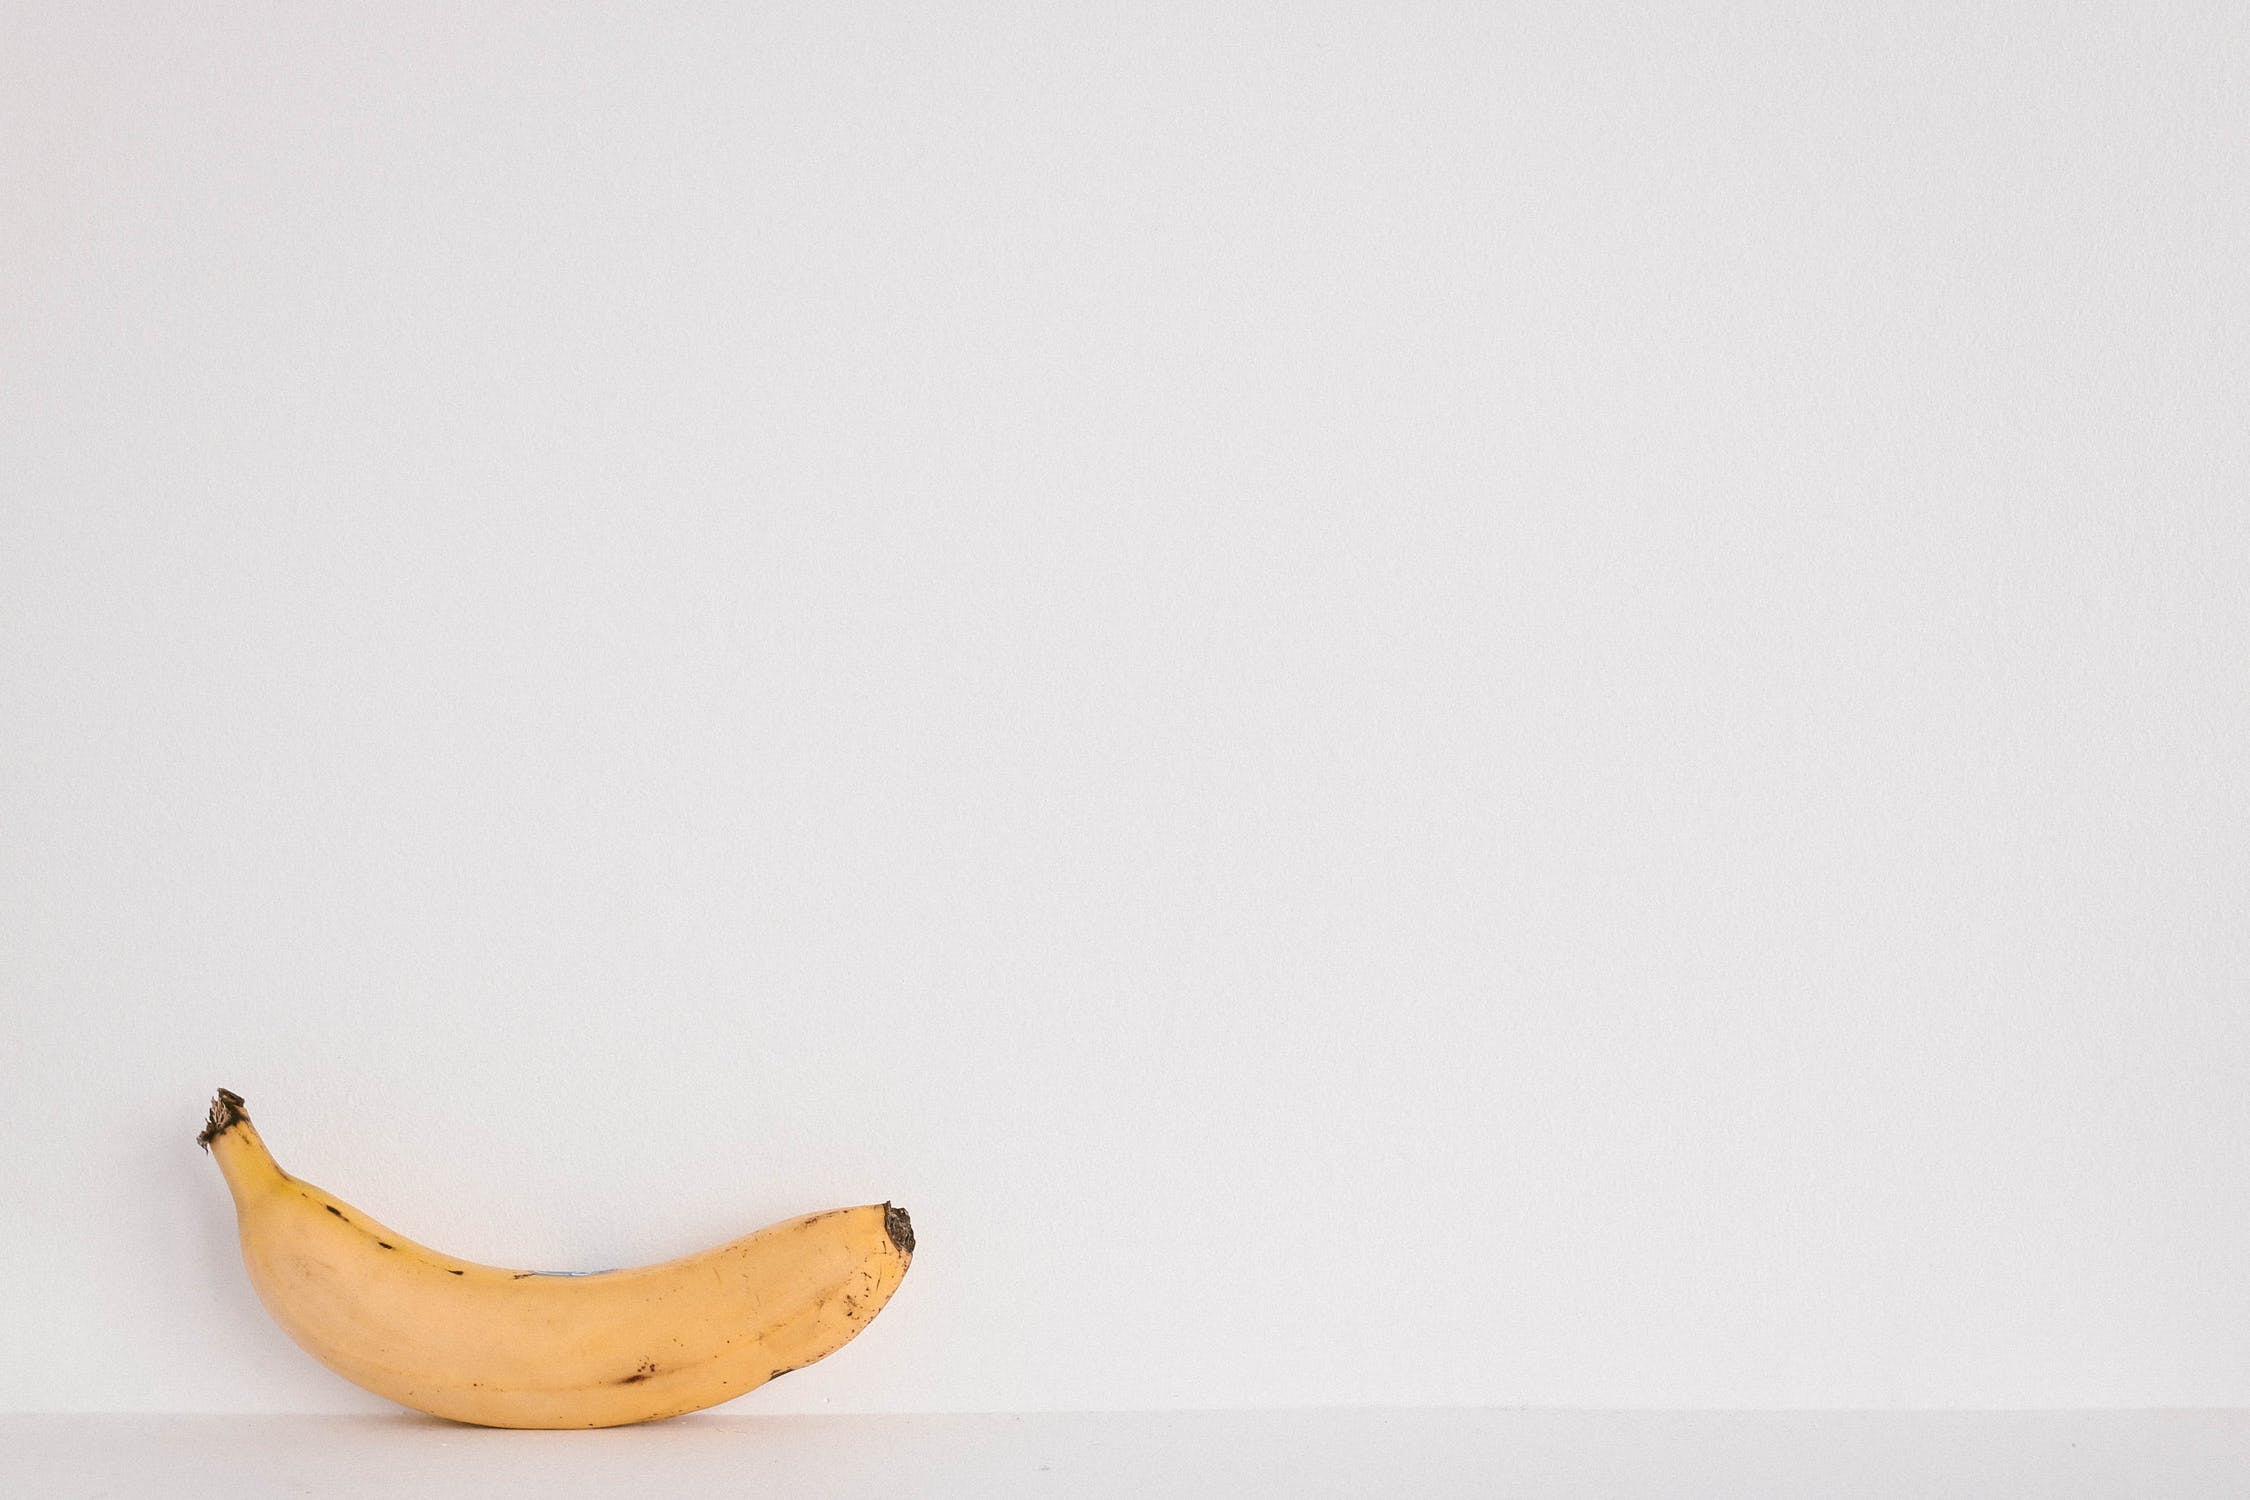

In [31]:
Image(filename='example1.jpg', width=600)

In [32]:
img_recognition_pretrain(process_img_path('example1.jpg'))

[('n03532672', 'hook', 0.07773937), ('n07753592', 'banana', 0.070150636), ('n03498962', 'hatchet', 0.063320726), ('n03598930', 'jigsaw_puzzle', 0.050685473)]


0.070150636

In [33]:
!wget https://www.tasteofhome.com/wp-content/uploads/2018/07/08-Foods-Queen-Elizabeth-II-Would-Never-Ever-Eat-shutterstock_331719362.jpg -O bananas.jpg
# your own image

--2021-04-08 23:17:05--  https://www.tasteofhome.com/wp-content/uploads/2018/07/08-Foods-Queen-Elizabeth-II-Would-Never-Ever-Eat-shutterstock_331719362.jpg
Resolving www.tasteofhome.com (www.tasteofhome.com)... 2606:4700::6812:1527, 2606:4700::6812:1427, 104.18.20.39, ...
Connecting to www.tasteofhome.com (www.tasteofhome.com)|2606:4700::6812:1527|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 238734 (233K) [image/jpeg]
Saving to: ‘bananas.jpg’

bananas.jpg         100%[===================>] 233.14K  --.-KB/s    in 0.1s    

2021-04-08 23:17:06 (2.32 MB/s) - ‘bananas.jpg’ saved [238734/238734]



In [34]:
img_recognition_pretrain(process_img_path('bananas.jpg'))

[('n07753592', 'banana', 0.8063237), ('n07747607', 'orange', 0.029396316), ('n07716358', 'zucchini', 0.02649874), ('n03041632', 'cleaver', 0.024497326)]


0.8063237

Notice that, while it gets it right, the confidence for the banana image is fairly low. That's because so much of the image is "not-banana"! How can this be improved? Bounding boxes to center on items of interest.

## Challenge

You will be expected to apply a pretrained model to a classificaiton problem today. 

# (BONUS) Hot Dog vs. Not Hot Dog

<img src="https://blog.paperspace.com/content/images/size/w2000/2018/04/maxresdefault.jpg" style="width: 600px;">

In this next section, we will try to build our own Image Classification model to detect whether a picture contains a Hot Dog or Not (any other food item). The data was downloaded from this Kaggle repository: https://www.kaggle.com/dansbecker/hot-dog-not-hot-dog

The Keras module includes three separate functions that can be used to train your model: `.fit`, `.fit_generator`, and `.train_on_batch`. All three of these functions can essentially accomplish the same task — but how they go about doing it is different.

The call to `.fit` is making two primary assumptions here:
- Our entire training set can fit into RAM
- There is no data augmentation going on (i.e., there is no need for Keras generators)

The call to `.fit_generator` enables us to:
- Iterate over a large data set that may not fit into memory.
- Enable us to perform data augmentation to avoid overfitting and increase the ability of our model to generalize.

The `.train_on_batch` function accepts a single batch of data, performs backpropagation, and then updates the model parameters.

For more information about data aumentations, feel free to review the following resources:
- Tensorflow Data Augmentation tutorial: https://www.tensorflow.org/tutorials/images/data_augmentation
- ImageDataGenerator Docs: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [35]:
!unzip hot-dog_not-hot-dog.zip
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Instantiate two image generator classes:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    data_format='channels_last',
    rotation_range=30,
    horizontal_flip=True,
    fill_mode='reflect')

valid_datagen = ImageDataGenerator(
    rescale=1.0/255,
    data_format='channels_last')

Archive:  hot-dog_not-hot-dog.zip
   creating: hot-dog_not-hot-dog/test/
   creating: hot-dog_not-hot-dog/test/hot_dog/
  inflating: hot-dog_not-hot-dog/test/hot_dog/133012.jpg  
  inflating: hot-dog_not-hot-dog/test/hot_dog/133015.jpg  
  inflating: hot-dog_not-hot-dog/test/hot_dog/133245.jpg  
  inflating: hot-dog_not-hot-dog/test/hot_dog/135628.jpg  
  inflating: hot-dog_not-hot-dog/test/hot_dog/138933.jpg  
  inflating: hot-dog_not-hot-dog/test/hot_dog/138937.jpg  
  inflating: hot-dog_not-hot-dog/test/hot_dog/138969.jpg  
  inflating: hot-dog_not-hot-dog/test/hot_dog/139177.jpg  
  inflating: hot-dog_not-hot-dog/test/hot_dog/142835.jpg  
  inflating: hot-dog_not-hot-dog/test/hot_dog/143012.jpg  
  inflating: hot-dog_not-hot-dog/test/hot_dog/144956.jpg  
  inflating: hot-dog_not-hot-dog/test/hot_dog/146227.jpg  
  inflating: hot-dog_not-hot-dog/test/hot_dog/146834.jpg  
  inflating: hot-dog_not-hot-dog/test/hot_dog/147874.jpg  
  inflating: hot-dog_not-hot-dog/test/hot_dog/152106.j

In [36]:

# Define the batch size:
batch_size=32

# Define the train and validation generators: 
train_generator = train_datagen.flow_from_directory(
    directory='./hot-dog_not-hot-dog/train',
    target_size=(224, 224),
    classes=['hot_dog','not_hot_dog'],
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    seed=42)

valid_generator = valid_datagen.flow_from_directory(
    directory='./hot-dog_not-hot-dog/test',
    target_size=(224, 224),
    classes=['hot_dog','not_hot_dog'],
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    seed=42)

Found 498 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


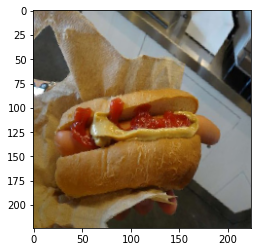

In [37]:
plt.imshow(train_generator[0][0][1]);

In [38]:
# Define the model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((3,3)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((3,3)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)             

In [39]:
cnn_hotdog = model.fit(train_generator,
                       epochs=10,
                       validation_data=valid_generator)

Epoch 1/10
16/16 [==============================] - 11s 645ms/step - loss: 0.7086 - accuracy: 0.5002 - val_loss: 0.6942 - val_accuracy: 0.4980
Epoch 2/10
16/16 [==============================] - 10s 631ms/step - loss: 0.6857 - accuracy: 0.5410 - val_loss: 0.7112 - val_accuracy: 0.5020
Epoch 3/10
16/16 [==============================] - 10s 630ms/step - loss: 0.6847 - accuracy: 0.5462 - val_loss: 0.7859 - val_accuracy: 0.5160
Epoch 4/10
16/16 [==============================] - 10s 616ms/step - loss: 0.6536 - accuracy: 0.6205 - val_loss: 0.6814 - val_accuracy: 0.5480
Epoch 5/10
16/16 [==============================] - 10s 628ms/step - loss: 0.6839 - accuracy: 0.5687 - val_loss: 0.6945 - val_accuracy: 0.5080
Epoch 6/10
16/16 [==============================] - 10s 651ms/step - loss: 0.6595 - accuracy: 0.5839 - val_loss: 0.6863 - val_accuracy: 0.5460
Epoch 7/10
16/16 [==============================] - 10s 619ms/step - loss: 0.6417 - accuracy: 0.6038 - val_loss: 0.8208 - val_accuracy: 0.5200

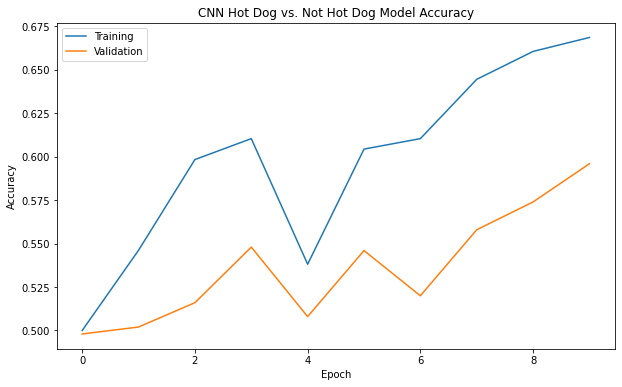

In [40]:
plt.figure(figsize=(10,6))
plt.plot(cnn_hotdog.epoch, cnn_hotdog.history['accuracy'], label='Training')
plt.plot(cnn_hotdog.epoch, cnn_hotdog.history['val_accuracy'], label='Validation')
plt.legend()
plt.title('CNN Hot Dog vs. Not Hot Dog Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy');

## Hot Dog vs. Not Hot Dog with Transfer Learning

The intuition behind transfer learning for image classification is that if a model is trained on a large and general enough dataset, this model will effectively serve as a generic model of the visual world. You can then take advantage of these learned feature maps without having to start from scratch by training a large model on a large dataset.

<br>
<img src="./convnet_components.png" style="width: 600px;">
<br>
<img src="./swapping_fc_classifier.png" style="width: 600px;">

In [41]:
from tensorflow.keras.applications.vgg19 import VGG19

# Load the pre-trained VVG19 Model
vgg19 = VGG19(include_top=False,
              weights='imagenet',
              input_shape=(224,224, 3),
              pooling=None)

# Freeze all the layers in the base VGGNet19 model
for layer in vgg19.layers:
    layer.trainable = False

80142336/80134624 [==============================] - 19s 0us/step


In [42]:
from tensorflow.keras.layers import Dropout

# Instantiate the sequential model and add the VGG19 model
model = Sequential()
for layer in vgg19.layers:
    model.add(layer)

# Add the custom layers atop the VGG19 model
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model for training
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [43]:
from tensorflow.keras.applications.vgg19 import preprocess_input

# Instantiate two image generator classes
# - Add preprocess_input function for vgg19
# - Remove scaling since that will be done in the preprocess_input function
train_datagen = ImageDataGenerator(
    data_format='channels_last',
    rotation_range=30,
    horizontal_flip=True,
    preprocessing_function=preprocess_input,
    fill_mode='reflect')

valid_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    data_format='channels_last')

# Define the train and validation generators 
train_generator = train_datagen.flow_from_directory(
    directory='./hot-dog_not-hot-dog/train',
    target_size=(224, 224),
    classes=['hot_dog','not_hot_dog'],
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    seed=42)

valid_generator = valid_datagen.flow_from_directory(
    directory='./hot-dog_not-hot-dog/test',
    target_size=(224, 224),
    classes=['hot_dog','not_hot_dog'],
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    seed=42)

Found 498 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


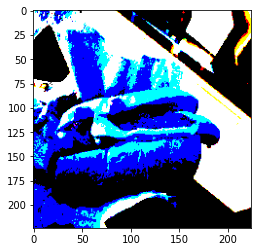

In [44]:
import matplotlib.pyplot as plt

plt.imshow(train_generator[0][0][1]);

In [45]:
vgg_hotdog = model.fit_generator(train_generator,
                                 epochs=10,
                                 validation_data=valid_generator)

/opt/anaconda3/envs/U4-S2-NN/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
16/16 [==============================] - 151s 10s/step - loss: 7.8378 - accuracy: 0.6430 - val_loss: 0.8959 - val_accuracy: 0.8480
Epoch 2/10
16/16 [==============================] - 144s 9s/step - loss: 0.7429 - accuracy: 0.8615 - val_loss: 0.5272 - val_accuracy: 0.8580
Epoch 3/10
16/16 [==============================] - 102s 7s/step - loss: 0.2986 - accuracy: 0.8995 - val_loss: 0.5781 - val_accuracy: 0.8500
Epoch 4/10
16/16 [==============================] - 101s 6s/step - loss: 0.2385 - accuracy: 0.9140 - val_loss: 0.5186 - val_accuracy: 0.8660
Epoch 5/10
16/16 [==============================] - 101s 6s/step - loss: 0.2099 - accuracy: 0.9111 - val_loss: 0.5549 - val_accuracy: 0.8820
Epoch 6/10
16/16 [==============================] - 102s 7s/step - loss: 0.2415 - accuracy: 0.9463 - val_loss: 0.5520 - val_accuracy: 0.8520
Epoch 7/10
16/16 [==============================] - 103s 7s/step - loss: 0.1723 - accuracy: 0.9495 - val_loss: 0.4975 - val_accuracy: 0.8680
Epoch 8/10
1

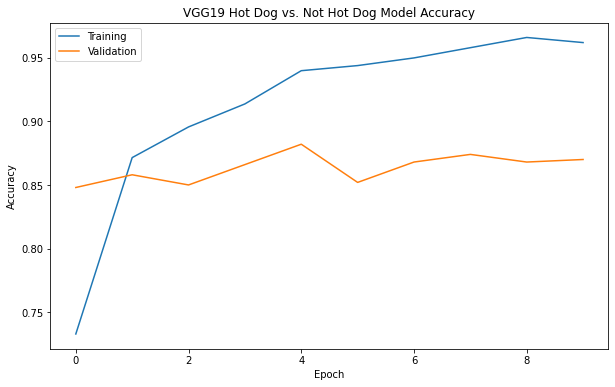

In [46]:
plt.figure(figsize=(10,6))
plt.plot(vgg_hotdog.epoch, vgg_hotdog.history['accuracy'], label='Training')
plt.plot(vgg_hotdog.epoch, vgg_hotdog.history['val_accuracy'], label='Validation')
plt.legend()
plt.title('VGG19 Hot Dog vs. Not Hot Dog Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy');

## Moment of Truth...

In [47]:
import cv2

img1 = cv2.imread('./hotdog_1.jpg')
img2 = cv2.imread('./hotdog_2.jpg')
print(img1.shape, img2.shape)

ModuleNotFoundError: No module named 'cv2'

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.axis("off");

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.axis("off");

In [ ]:
import tensorflow as tf

img1_reshaped = tf.image.resize(img1, [224, 224])
img2_reshaped = tf.image.resize(img2, [224, 224])
print(img1_reshaped.shape, img2_reshaped.shape)

In [ ]:
img1_final = tf.expand_dims(img1_reshaped, axis=0)
img2_final = tf.expand_dims(img2_reshaped, axis=0)
print(img1_final.shape, img2_final.shape)

In [ ]:
train_generator.class_indices

In [ ]:
model.predict(preprocess_input(img1_final), steps=1)

In [ ]:
model.predict(preprocess_input(img2_final), steps=1)

## Challenge

You will be expected to apply a pretrained model to a classificaiton problem today. 

# Review

- <a href="#p1">Part 1: </a>Describe convolution and pooling
    * A Convolution is a function applied to another function to produce a third function
    * Convolutional Kernels are typically 'learned' during the process of training a Convolution Neural Network
    * Pooling is a dimensionality reduction technique that uses either Max or Average of a feature map region to downsample data
- <a href="#p2">Part 2: </a>Apply a convolutional neural network to a classification task
    * Keras has layers for convolutions :) 
- <a href="#p3">Part 3: </a>Transfer Learning for Image Classification
    * Check out both pretinaed models available in Keras & TensorFlow Hub

# Sources

- *_Deep Learning_*. Goodfellow *et al.*
- *Hands-on Machine Learnign with Scikit-Learn, Keras & Tensorflow*
- [Keras CNN Tutorial](https://www.tensorflow.org/tutorials/images/cnn)
- [Tensorflow + Keras](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)
- [Convolution Wiki](https://en.wikipedia.org/wiki/Convolution)
- [Keras Conv2D: Working with CNN 2D Convolutions in Keras](https://missinglink.ai/guides/keras/keras-conv2d-working-cnn-2d-convolutions-keras/)
- [Intuitively Understanding Convolutions for Deep Learning](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1)
- [A Beginner's Guide to Understanding Convolutional Neural Networks Part 2](https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/)